In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Возьму для исследования датасет с атлетами-пауэрлифтерами и их выступлениями. Пауэрлифтинг - вид спорта, где человек выполняет 3 упражнения - жим штанги лёжа от груди, приседание со штангой на плечах и становую тягу, по 3 попытки в каждом движении. Результат выступления спортсмена вычисляется как сумма лучших попыток в каждом упражнении. Поставлю гипотезы и попробую их подтвердить/опровергнуть, а также постараюсь узнать множество интересных вещей из датасета.

Я не могу поместить данные на Гитхаб, так как размер датасета велик, поэтому вот ссылка на него: https://www.kaggle.com/datasets/docgenki/powerlifting-dataset?resource=download

In [3]:
data = pd.read_csv('D:\\Учеба\\2 курс\\Наука о данных\\openpowerlifting-2023-04-08-a090afd8.csv')
data.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2820\952228863.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\\Учеба\\2 курс\\Наука о данных\\openpowerlifting-2023-04-08-a090afd8.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [4]:
# добавлю в данные столбец MaxTotalKg, который для каждого атлета покажет максимальный поднятый им вес за все времена
data['MaxTotalKg'] = data.groupby('Name')['TotalKg'].transform('max')
print(data.columns)

# Проверю данные на наличие пропусков:
print(np.any(data.isna(), axis=0))

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'MaxTotalKg'],
      dtype='object')
Name                False
Sex                 False
Event               False
Equipment           False
Age                  True
AgeClass             True
BirthYearClass       True
Division             True
BodyweightKg         True
WeightClassKg        True
Squat1Kg             True
Squat2Kg             True
Squat3Kg             True
Squat4Kg             True
Best3SquatKg         

Пропуски имеются во многих колонках, так что буду учитывать это при анализе данных

In [5]:
# проверю данные на наличие выбросов:
print('Возраст: ', max(data['Age']), min(data['Age']))
print('Собственный вес тела: ', max(data['BodyweightKg']), min(data['BodyweightKg']))
print('Вес штанги в приседаниях: ', max(data['Best3SquatKg']), min(data['Best3SquatKg']))
print('Вес штанги в жиме лёжа: ', max(data['Best3BenchKg']), min(data['Best3BenchKg']))
print('Вес штанги в становой тяге: ', max(data['Best3DeadliftKg']), min(data['Best3DeadliftKg']))
print('Сумма, набранная в 3 упражнениях: ', max(data['TotalKg']), min(data['TotalKg']))

Возраст:  98.0 0.0
Собственный вес тела:  300.0 10.0
Вес штанги в приседаниях:  595.0 -508.02
Вес штанги в жиме лёжа:  612.5 -522.5
Вес штанги в становой тяге:  487.5 -410.0
Сумма, набранная в 3 упражнениях:  1407.5 1.0


В целом, я верю, что человек мог выступать на соревнованиях в возрасте 98 лет. Силовые в приседе, жиме, тяге тоже соответствуют мировым рекордам в этих упражнениях. Но меня смутил тот факт, что на соревнованиях выступал человек в возрасте 0 лет, какой-то человек выступал при собственном весе 10 кг и ещё кто-то поднял в сумме 3 упражнений 1 кг. Я хочу посмотреть на эти случаи отдельно, так как мне кажется, что это всего лишь выбросы:                   

In [6]:
print("Люди, которым 0 лет: ", data[data['Age'] == min(data['Age'])]) 

# точно выбросы, так как не может человек в 0 лет весить 67,5 и более кг
# вероятно, их возраст просто не записывался на этих соревнованиях

Люди, которым 0 лет:                    Name Sex Event   Equipment  Age AgeClass BirthYearClass  \
1173524     Tony Young   M   SBD  Single-ply  0.0      NaN            NaN   
1193684      Aaron Nee   M   SBD  Single-ply  0.0      NaN            NaN   
1239709     Rob Jadick   M     B         Raw  0.0      NaN            NaN   
1239710     Rob Jadick   M     B         Raw  0.0      NaN            NaN   
1369730  Brian Carroll   M   SBD  Single-ply  0.0      NaN            NaN   
1411984  Chris Hoskins   M   SBD  Single-ply  0.0      NaN            NaN   

        Division  BodyweightKg WeightClassKg  ...  Country  State  Federation  \
1173524     Open          67.5          67.5  ...      USA    NaN        USPF   
1193684     Open         100.0           100  ...      NaN    NaN        USPF   
1239709        O          90.0            90  ...      USA    NaN        WNPF   
1239710       LT          90.0            90  ...      USA    NaN        WNPF   
1369730   Novice          67.5   

In [7]:
print("Люди, весом менее 20 кг: ", data[data['BodyweightKg'] < 20]) 

# оказывается, в соревнованиях выступали дети от 4 лет, тогда понятно, почему некоторые участники весят
# менее 20 кг. Хотя у других стоит NaN в возрасте, это уже вполне могут быть выбросы.

Люди, весом менее 20 кг:                        Name Sex Event   Equipment   Age AgeClass  \
32355          Chase Zollo   M   SBD         Raw   5.0     5-12   
35068         Caden Cooper   M     B         Raw   6.0     5-12   
37027           Uriah Mara   M     D         Raw   NaN      NaN   
37469     Sehajpreet Singh   M     B         Raw   5.0     5-12   
37503               Ananya   F     B         Raw   7.0     5-12   
38090           Noah Caola   M     D         Raw   4.0      NaN   
39850            Ara Price   F     D         Raw   8.0     5-12   
188543       Semen Davydov   M   SBD         Raw   8.5     5-12   
302325      Giacomo Moritz   M   SBD         Raw   8.0     5-12   
302410      Giacomo Moritz   M   SBD         Raw   8.0     5-12   
302840      Giacomo Moritz   M   SBD         Raw   7.0     5-12   
303215      Giacomo Moritz   M   SBD         Raw   7.0     5-12   
451366     Holden Hansford   M   SBD         Raw   7.5     5-12   
1117963           Eli Pyne   M     D

In [8]:
print("Люди, поднявшие 1 кг в сумме троеборья: ", data[data['TotalKg'] == 1]) 

# такой случай действительно существует, я проверил. Возможно, человек выступил по приколу

Люди, поднявшие 1 кг в сумме троеборья:                    Name Sex Event Equipment   Age AgeClass BirthYearClass  \
1698139  Vadim Tokarev   M     B       Raw  54.5    50-54          50-59   

          Division  BodyweightKg WeightClassKg  ...  Country  State  \
1698139  Masters 2          83.0            83  ...   Russia    NaN   

         Federation  ParentFederation        Date  MeetCountry  MeetState  \
1698139         FPR               IPF  2020-02-15       Russia        MOW   

         MeetTown                                   MeetName  MaxTotalKg  
1698139    Moscow  Russian Masters Bench Press Championships       505.0  

[1 rows x 42 columns]


В целом, выбросов немного, они не окажут сильного влияния на исследование. А вот пропусков в данных много, стоит это учесть при анализе данных.

Гипотеза 1: Соотношение результата в приседаниях со штангой на плечах к результату в жиме штанги лёжа от груди у женщин в среднем больше, чем у мужчин

В спортзалах ходит поверье, что женщины сильны в приседаниях и становой тяге и что в этих движениях они зачастую могут составить конкуренцию мужчинам. Но в то же время принято считать, что женщины - плохие жимовики, и здесь они сильно отстают от мужчин. Я хочу проверить при помощи цифр, так ли оно на самом деле.

In [9]:
df1 = data[(data['Best3SquatKg'] > 0) & (data['Best3BenchKg'] > 0)]
df1_m = df1[df1['Sex'] == 'M'] # мужчины
df1_f = df1[df1['Sex'] == 'F'] # женщины

print('Средний жим лёжа от груди, Среднее приседание, Среднее соотношение ')
print('Мужчины: ', np.mean(df1_m['Best3BenchKg']), np.mean(df1_m['Best3SquatKg']), np.mean(df1_m['Best3SquatKg']/df1_m['Best3BenchKg']))
print('Женщины: ', np.mean(df1_f['Best3BenchKg']), np.mean(df1_f['Best3SquatKg']), np.mean(df1_f['Best3SquatKg']/df1_f['Best3BenchKg']))

Средний жим лёжа от груди, Среднее приседание, Среднее соотношение 
Мужчины:  129.14700892880322 197.87779478513983 1.5644432055932975
Женщины:  61.744256027442724 113.6003077568234 1.8838947019353536


Как видно, мужчины в среднем приседают с весом в 1,5 раза больше, чем жмут, в то время как женщины приседают с весом почти в 2 раза большим, чем способны пожать лёжа от груди. Гипотеза подтвердилась. Это может быть связано с особенностями анатомии и физического строения.

Гипотеза 2: У легковесов становая тяга обычно выше, чем присед, в то время как у тяжей вес штанги на приседаниях обычно выше, чем в становой тяге

Легковесами буду считать атлетов с собственным весов менее 90 кг, а тяжами буду считать тех, кто весит более 120 кг:

In [10]:
df2 = data[(data['Best3SquatKg'] > 0) & (data['Best3DeadliftKg'] > 0)]
df2_l = df2[df2['BodyweightKg'] < 90] # легковесы
df2_t = df2[df2['BodyweightKg'] > 120] # тяжи

print('Среднестатистическая становая тяга и присед: ')
print('Легковесы: ', np.mean(df2_l['Best3DeadliftKg']), np.mean(df2_l['Best3SquatKg']))
print('Тяжеловесы: ', np.mean(df2_t['Best3DeadliftKg']), np.mean(df2_t['Best3SquatKg']))

Среднестатистическая становая тяга и присед: 
Легковесы:  167.57804464251643 150.04263187007305
Тяжеловесы:  241.56328642873933 247.8599740619757


Действительно, у легковесов становая тяга заходит лучше приседаний, в то время как у тяжей всё наоборот. Объяснение может быть связано с изменением рычагов/центра масс при изменении веса атлета. Проверю среднее соотношение тяги к приседу для спортсменов-мужчин каждой весовой категории и отображу зависимость на графике:

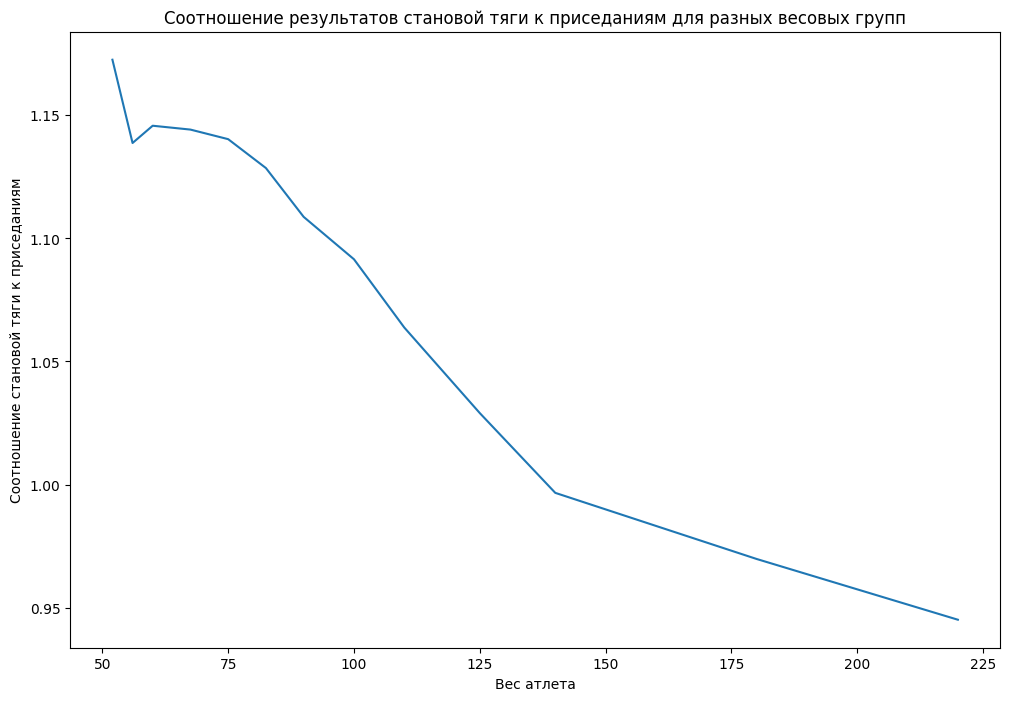

In [11]:
df3 = data[(data['Best3SquatKg'] > 0) & (data['Best3DeadliftKg'] > 0) & (data['Sex'] == 'M')]
df3 = df3[(df3['Best3DeadliftKg']/df3['Best3SquatKg'] > 0.5) & (df3['Best3DeadliftKg']/df3['Best3SquatKg'] < 2)] # исключаю выбросы

# определю весовые категории для графика: до 52 кг; 52-56; 56-60; 60-67,5; 67,5-75; 75-82,5; 82,5-90; 90-100; 100-110; 110-125; 125-140; 140+ (такие весовые в федерации WRPF)
# и посчитаю среднее соотношение тяги к приседу для атлетов каждой весовой группы:
weight_groups = [0, 52, 56, 60, 67.5, 75, 82.5, 90, 100, 110, 125, 140, 180, 220]
ans = []
for i in range(1, len(weight_groups)):
    df3_i = df3[(df3['BodyweightKg'] > weight_groups[i-1]) & (df3['BodyweightKg'] < weight_groups[i])]
    ans.append(np.mean(df3_i['Best3DeadliftKg']/df3_i['Best3SquatKg']))

# Построю график:
plt.figure(figsize=(12, 8))

plt.plot(weight_groups[1:], ans)
plt.title('Соотношение результатов становой тяги к приседаниям для разных весовых групп')
plt.xlabel('Вес атлета')
plt.ylabel('Соотношение становой тяги к приседаниям')

plt.show()

Корреляция между весом атлета и его относительной силой в тяге к приседу отчётливо заметна. Чем больше вес атлета, тем легче ему приседать, чем тянуть. А со 140 кг атлеты и вовсе поднимают в приседаниях больший вес, чем в становой тяге. Гипотеза подтвердилась.

А теперь мне интересно посмотреть на свои силовые относительно других атлетов: я жму лёжа 90 кг, приседаю 135 кг и тяну 200 кг при собственном весе 75 кг. Гляну на своё местоположение в мире пауэрлифтинга по сравнению с опытными атлетами:

In [12]:
# сколько атлетов-мужчин весом 70-80 кг жмут штангу лёжа от груди не меньше меня (без экипировки)?
df4 = data[(data['Best3BenchKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 70) & (data['BodyweightKg'] <= 80) & (data['Equipment'] == 'Raw')]
df_bench = np.where(df4['Best3BenchKg'] <= 90, 1, 0)
print(f'Мой квантиль в жиме: {100*np.sum(df_bench)/len(df_bench)} %')

# сколько атлетов-мужчин весом 70-80 кг приседают со штангой на плечах с результатом не меньше моего (без экипировки)?
df4 = data[(data['Best3SquatKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 70) & (data['BodyweightKg'] <= 80) & (data['Equipment'] == 'Raw')]
df_squat = np.where(df4['Best3SquatKg'] <= 135, 1, 0)
print(f'Мой квантиль в приседе: {100*np.sum(df_squat)/len(df_squat)} %')

# сколько атлетов-мужчин весом 70-80 кг тянут штангу не меньше меня (без экипировки)?
df4 = data[(data['Best3DeadliftKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 70) & (data['BodyweightKg'] <= 80) & (data['Equipment'] == 'Raw')]
df_deadlift = np.where(df4['Best3DeadliftKg'] <= 200, 1, 0)
print(f'Мой квантиль в становой тяге: {100*np.sum(df_deadlift)/len(df_deadlift)} %')

# как много спортсменов имеют такой же сильный разрыв между тягой и жимом, как у меня (или сильнее), без экипировки:
df4 = data[(data['Best3DeadliftKg'] > 0) & (data['Best3BenchKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 70) & (data['BodyweightKg'] <= 80) & (data['Equipment'] == 'Raw')]
df_ratio = np.where(df4['Best3DeadliftKg']/df4['Best3BenchKg'] >= 200/90, 1, 0)
print(f'Вот столько атлетов имеют такой же разрыв между тягой и жимом, как и я (или сильнее): {100*np.sum(df_ratio)/len(df_ratio)} %')

# каков минимальный вес спортсмена, который делает становую тягу лучше меня, без экипировки (понижаю самооценку):
df4 = data[(data['Best3DeadliftKg'] > 200) & (data['Sex'] == 'M') & (data['Equipment'] == 'Raw')]
print(f'Самый лёгкий по весу атлет, который тянет больше меня, весит: {np.min(df4["BodyweightKg"])} кг')

# каков минимальный вес спортсмена, который жмёт штангу лёжа от груди лучше меня, без экипировки (снова понижаю самооценку):
df4 = data[(data['Best3BenchKg'] > 90) & (data['Sex'] == 'M') & (data['Equipment'] == 'Raw')]
print(f'Самый лёгкий по весу атлет, который жмёт от груди больше меня, весит: {np.min(df4["BodyweightKg"])} кг')

# каков минимальный вес спортсмена СРЕДИ ЖЕНЩИН, который жмёт штангу лёжа от груди лучше меня, без экипировки (окончательно убиваю самооценку):
df4 = data[(data['Best3BenchKg'] > 90) & (data['Sex'] == 'F') & (data['Equipment'] == 'Raw')]
print(f'Самая лёгкая женщина-атлет, которая жмёт от груди больше меня, весит: {np.min(df4["BodyweightKg"])} кг')

Мой квантиль в жиме: 15.254958776436851 %
Мой квантиль в приседе: 17.074216548648714 %
Мой квантиль в становой тяге: 51.5254203402707 %
Вот столько атлетов имеют такой же разрыв между тягой и жимом, как и я (или сильнее): 7.44992176208507 %
Самый лёгкий по весу атлет, который тянет больше меня, весит: 47.2 кг
Самый лёгкий по весу атлет, который жмёт от груди больше меня, весит: 31.68 кг
Самая лёгкая женщина-атлет, которая жмёт от груди больше меня, весит: 36.86 кг


А теперь мне интересно выявить для каждого веса атлета, чему равно максимальное и среднее количество собственных весов, поднятых в каждом упражнении (среди мужчин). А затем проследить возможную взаимосвязь.
Гипотеза 3 такова, что, несмотря на очевидную прибавку в абсолютном результате, атлет поднимает меньше собственных весов при увеличении весовой категории. Проверю это при помощи цифр.

Жим лёжа:

C:\Users\Admin\AppData\Local\Temp\ipykernel_2820\2601468203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['BodyweightKgRounded'] = np.round(df5['BodyweightKg'])


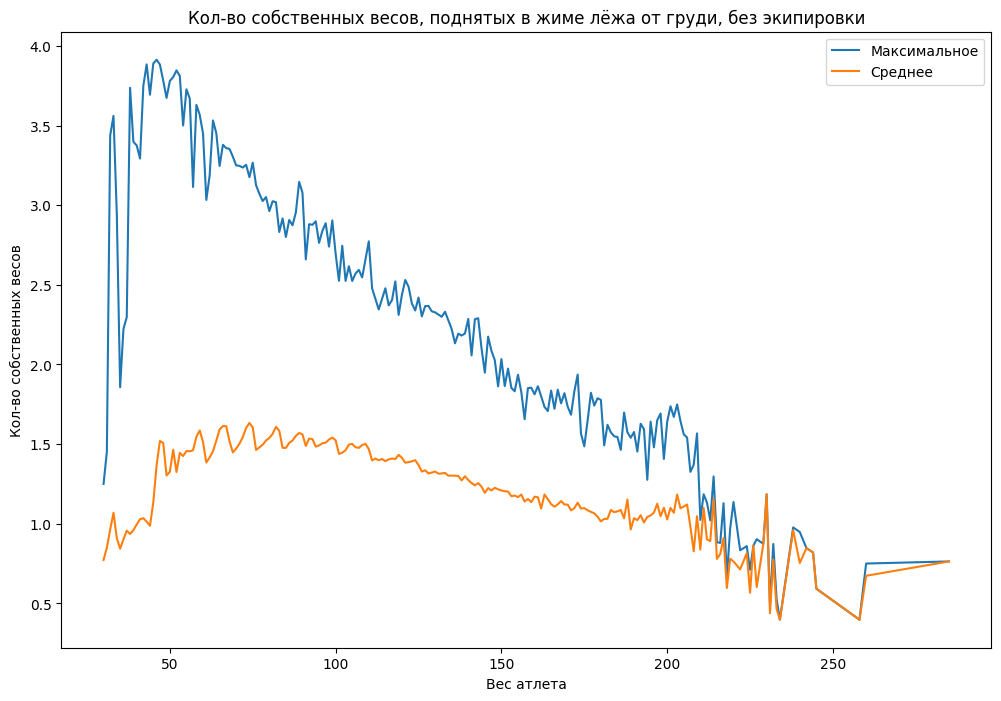

In [13]:
df5 = data[(data['Best3BenchKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 30) & (data['Equipment'] == 'Raw')]
df5['BodyweightKgRounded'] = np.round(df5['BodyweightKg'])

bench_max = df5.groupby('BodyweightKgRounded')['Best3BenchKg'].max()
bench_max_res = [value / index for index, value in bench_max.items()]
bench_mean = df5.groupby('BodyweightKgRounded')['Best3BenchKg'].mean()
bench_mean_res = [value / index for index, value in bench_mean.items()]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(bench_max.index, bench_max_res, label='Максимальное')
ax.plot(bench_mean.index, bench_mean_res, label='Среднее')

ax.set_title('Кол-во собственных весов, поднятых в жиме лёжа от груди, без экипировки')
ax.set_xlabel('Вес атлета')
ax.set_ylabel('Кол-во собственных весов')
ax.legend()

plt.show()

Становая тяга:

C:\Users\Admin\AppData\Local\Temp\ipykernel_2820\3830929783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['BodyweightKgRounded'] = np.round(df6['BodyweightKg'])


2          105.0
3          170.0
4          125.0
5          115.0
6           55.0
           ...  
2880023    300.0
2880024    272.5
2880025    280.0
2880026    255.0
2880860    145.0
Name: Best3DeadliftKg, Length: 562360, dtype: float64


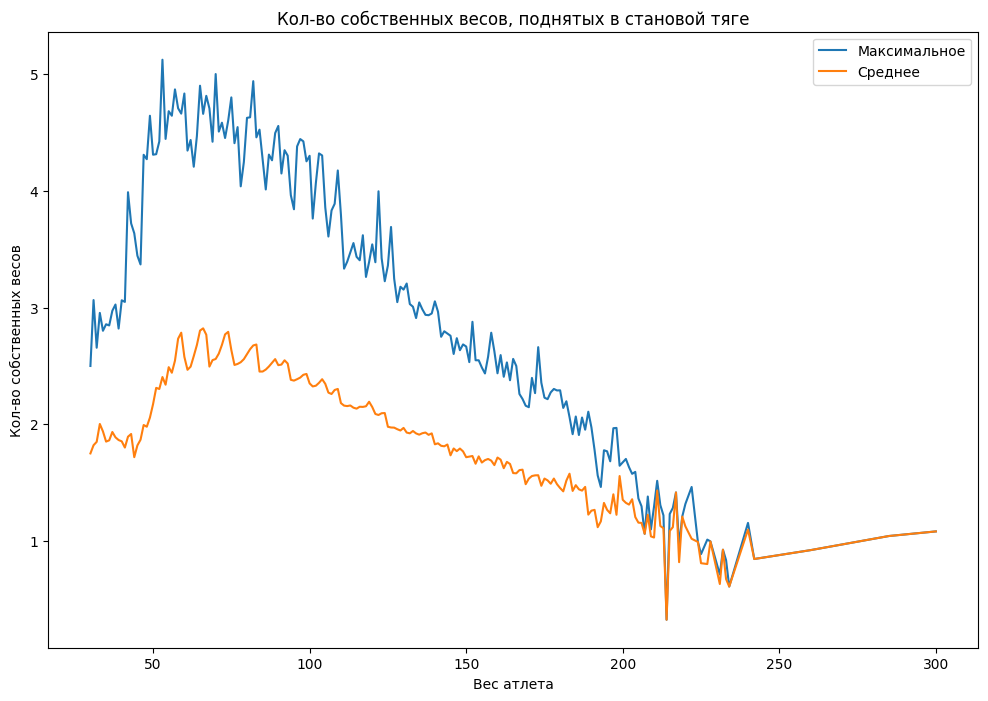

In [30]:
df6 = data[(data['Best3DeadliftKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 30) & (data['Equipment'] == 'Raw')]
df6['BodyweightKgRounded'] = np.round(df6['BodyweightKg'])

deadlift_max = df6.groupby('BodyweightKgRounded')['Best3DeadliftKg'].max()
deadlift_max_res = [value / index for index, value in deadlift_max.items()]
deadlift_mean = df6.groupby('BodyweightKgRounded')['Best3DeadliftKg'].mean()
deadlift_mean_res = [value / index for index, value in deadlift_mean.items()]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(deadlift_max.index, deadlift_max_res, label='Максимальное')
ax.plot(deadlift_mean.index, deadlift_mean_res, label='Среднее')

ax.set_title('Кол-во собственных весов, поднятых в становой тяге')
ax.set_xlabel('Вес атлета')
ax.set_ylabel('Кол-во собственных весов')
ax.legend()

plt.show()

Приседания со штангой на плечах:

C:\Users\Admin\AppData\Local\Temp\ipykernel_2820\2214706610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['BodyweightKgRounded'] = np.round(df7['BodyweightKg'])


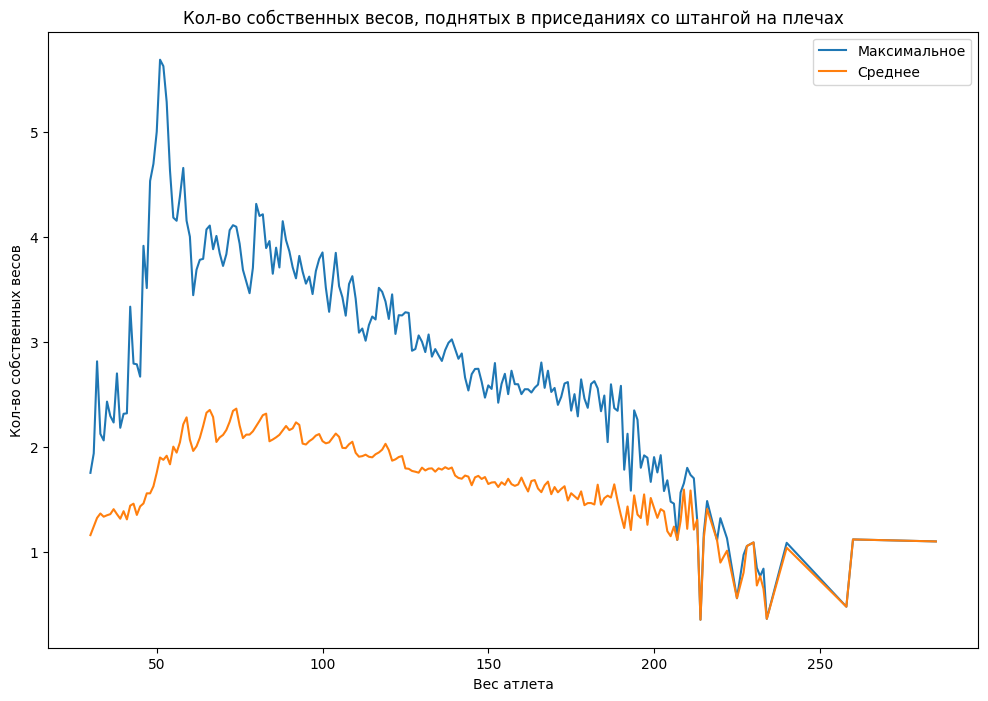

In [15]:
df7 = data[(data['Best3SquatKg'] > 0) & (data['Sex'] == 'M') & (data['BodyweightKg'] > 30) & (data['Equipment'] == 'Raw')]
df7['BodyweightKgRounded'] = np.round(df7['BodyweightKg'])

squat_max = df7.groupby('BodyweightKgRounded')['Best3SquatKg'].max()
squat_max_res = [value / index for index, value in squat_max.items()]
squat_mean = df7.groupby('BodyweightKgRounded')['Best3SquatKg'].mean()
squat_mean_res = [value / index for index, value in squat_mean.items()]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(squat_max.index, squat_max_res, label='Максимальное')
ax.plot(squat_mean.index, squat_mean_res, label='Среднее')

ax.set_title('Кол-во собственных весов, поднятых в приседаниях со штангой на плечах')
ax.set_xlabel('Вес атлета')
ax.set_ylabel('Кол-во собственных весов')
ax.legend()

plt.show()

Итого, гипотеза 3 подтвердилась. Действительно, в каждом упражнении троеборья с увеличением веса спортсмена уменьшается количество собственных весов, которые он может поднять.

А теперь применю в проекте машинное обучение. Постараюсь предсказать с помощью градиентного бустинга вес в безэкипировочной становой тяге, который скорее всего поднимет спортсмен, на основе его жима лёжа, приседаний, собственного веса, возраста и пола.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

df8 = data[(data['Best3BenchKg'] > 0) & (data['Best3SquatKg'] > 0) & (data['Best3DeadliftKg'] > 0) & (data['Equipment'] == 'Raw') & (data['Sex'] != 'Mx')]

# преобразую категориальную фичу (Пол):
df8.loc[df8['Sex'] == 'F', 'Sex'] = 0
df8.loc[df8['Sex'] == 'M', 'Sex'] = 1

# данных много, поэтому строки с пропусками можно просто не брать для исследования
df8 = df8.dropna()

X = df8[['Age', 'Sex', 'BodyweightKg', 'Best3BenchKg', 'Best3SquatKg']]
y = df8['Best3DeadliftKg']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=88)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

Среднеквадратичная ошибка: 389.10023342618507


Отлично, а теперь попробую предсказать свою становую тягу после введения соответствующих личных данных:

In [45]:
df_example = pd.DataFrame({'Age': [19], 'Sex': [1], 'BodyweightKg': [75], 'Best3BenchKg': [90], 'Best3SquatKg': [135]})
pred_example = model.predict(df_example)
print(pred_example)

[161.13646754]


Получилось далеко от реальности, ведь моя становая тяга 200 кг. Видимо, я предназначен для того, чтобы тянуть :)